In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from preprocessing import DataProcessor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, f1_score, precision_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler, power_transform, MinMaxScaler
from sklearn.feature_selection import  SelectKBest, chi2
#from lightgbm import LGBMClassifier

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
heroes_information = pd.read_csv("/Users/aurelianosancho/.cache/kagglehub/datasets/claudiodavi/superhero-set/versions/1/heroes_information.csv", index_col=0)
heroes_information = heroes_information.drop_duplicates(subset='name')
super_hero_powers = pd.read_csv("/Users/aurelianosancho/.cache/kagglehub/datasets/claudiodavi/superhero-set/versions/1/super_hero_powers.csv", index_col=0)
super_hero_powers.index.name = 'name'
super_hero_powers.reset_index(inplace=True)
df = heroes_information.merge(super_hero_powers, on='name', how='inner')

In [3]:
processor = DataProcessor(df)
processor.preprocessing(use_weight=True)
processor.normalize_min_max(use_weight=True)
cat_heroes_information = ['Gender', 'Eye color', 'Hair color', 'Publisher']
cat_super_hero_powers = list(super_hero_powers.columns)
cat_super_hero_powers.remove('name')
cat_cols = cat_super_hero_powers + cat_heroes_information
processor.onehot_encode_columns(cat_heroes_information)
model_base = processor.df
model_base.set_index('name', inplace=True)
model_base.head(3)

,Height,Alignment,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,...,Hair color_Yellow,Hair color_black,Hair color_blond,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Marvel Comics,Publisher_Shueisha,Publisher_Star Trek,Publisher_Team Epic TV,Publisher_Unknown
name,,,,,,,,,,,,,,,,,,,,,
Abe Sapien,0.739130,good,65.0,True,True,False,False,True,True,False,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Abin Sur,0.608696,good,90.0,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Absorbing Man,0.782609,bad,122.0,False,False,False,False,True,True,False,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
important_features = [
    "Energy Manipulation",
    "Hair color_Blond",
    "Hypnokinesis",
    "Weight",
    "Eye color_blue",
    "Force Fields",
    "Enhanced Senses",
    "Height",
    "Hair color_Black",
    "Power Suit",
    "Intangibility",
    "Psionic Powers",
    "Phasing",
    "Size Changing",
    "Hair color_No Hair",
    "Toxin and Disease Resistance",
    "Levitation",
    "Intelligence",
    "Longevity"
]

model_base = model_base[important_features]

In [4]:
X = model_base.drop(['Weight','Alignment'], axis = 1)

y = model_base['Weight']

In [5]:
y

name
Abe Sapien          65.0
Abin Sur            90.0
Absorbing Man      122.0
Adam Strange        88.0
Agent Bob           81.0
                   ...  
X-Man               61.0
Yellowjacket        83.0
Yellowjacket II     52.0
Zatanna             57.0
Zoom                81.0
Name: Weight, Length: 353, dtype: float64

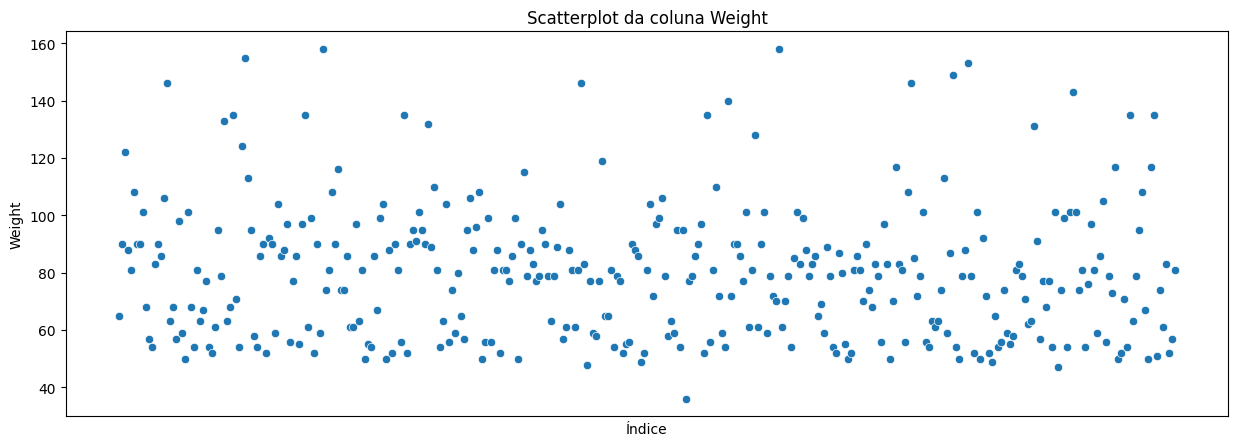

In [6]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=model_base.index, y=model_base['Weight'])
plt.xlabel("Índice")
plt.ylabel('Weight')
plt.title("Scatterplot da coluna Weight")
plt.xticks([]) 
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=451, test_size=0.25)

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)

# Treinando o modelo com os dados de treino
rf_regressor.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_pred_rf = rf_regressor.predict(X_test)

# Avaliando o modelo com métricas de regressão
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - Mean Squared Error (MSE):", mse_rf)
print("Random Forest Regressor - R-squared (R2):", r2_rf)

Random Forest Regressor - Mean Squared Error (MSE): 368.75685393258436
Random Forest Regressor - R-squared (R2): 0.38316326267716294


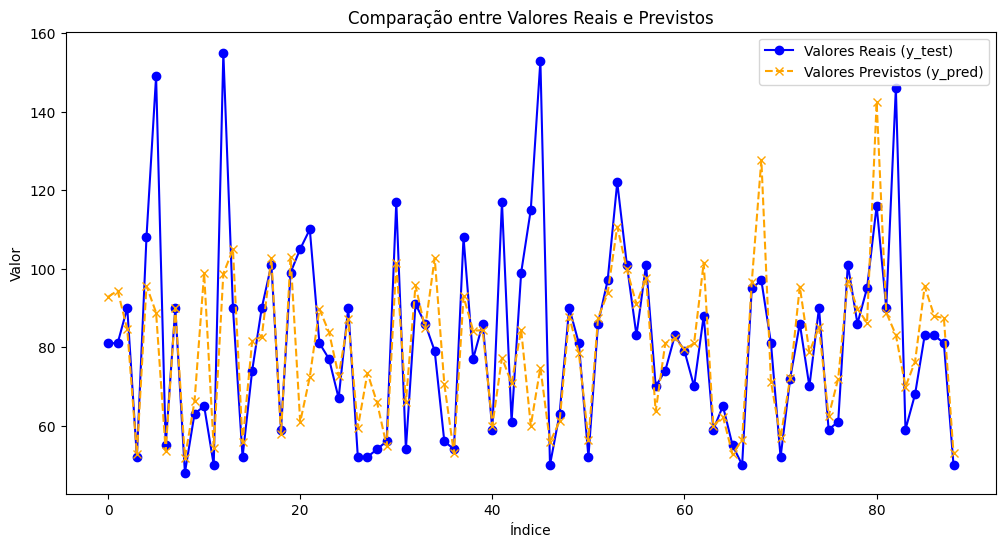

In [19]:
y_pred = rf_regressor.predict(X_test)

# Plotando os valores reais e os previstos
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Valores Reais (y_test)', color='blue', marker='o', linestyle='-')
plt.plot(range(len(y_pred)), y_pred, label='Valores Previstos (y_pred)', color='orange', marker='x', linestyle='--')
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.title("Comparação entre Valores Reais e Previstos")
plt.legend()
plt.show()